In [7]:
import sympy as sy

In [8]:
import mpmath as mp

In [9]:
import math as m
from math import sin, log, cos

In [33]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

**PROBLEM 1**

In [12]:
x = sy.symbols('x')
sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)),x)

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [9]:
x = sy.symbols('x')
sy_f = sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)),x)
f = sy.lambdify(x, sy_f)

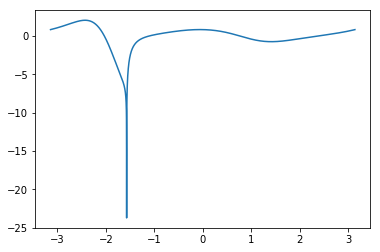

In [10]:
xlist = np.arange(-m.pi, m.pi, 0.0001)
ylist = map(f,xlist)
plt.plot(list(xlist), list(ylist))
plt.show()

C:\Users\woute\Anaconda3\lib\site-packages\numpy\lib\scimath.py:262: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)
<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


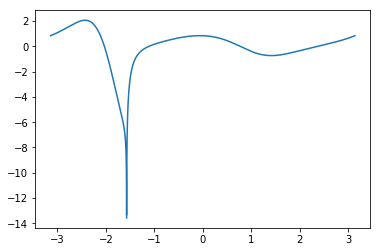

In [11]:
xmin, xmax = -mp.pi, mp.pi
g = lambda x: float(xmin) + float(xmax - xmin) / points * x

x = sy.symbols('x')
sy_f = sy.diff((sy.sin(x)+1)**sy.sin(sy.cos(x)),x)
f = sy.lambdify(x, sy_f)

points = 1e4
values = list(range(int(points)+1))
xlist = list(map(g, values))
ylist = list(map(f, xlist))
plt.plot(list(xlist), list(ylist))
plt.show()

In [14]:
def exact_deriv(f_in, x_in):
    x = sy.symbols('x')
    sy_f = sy.diff(f_in,x)
    deriv = sy.lambdify(x, sy_f) 
    result = deriv(x_in)
    
    return result

In [15]:
exact_deriv((sy.sin(x)+1)**sy.sin(sy.cos(x)),0)

0.8414709848078965

**PROBLEM 2**

In [17]:
def forward_one(f_in, x_in, h):
    x = sy.symbols('x')
    f = sy.lambdify(x, f_in)
    
    quotients = (f(x_in+h)-f(x_in))/h
    
    return quotients

def forward_two(f_in, x_in, h):
    x = sy.symbols('x')
    f = sy.lambdify(x, f_in)
    
    quotients = (-3*f(x_in)+4*f(x_in+h)-f(x_in+2*h))/(2*h)
    
    return quotients

def backward_one(f_in, x_in, h):
    x = sy.symbols('x')
    f = sy.lambdify(x, f_in)
    
    quotients = (f(x_in)-f(x_in-h))/h
    
    return quotients

def backward_two(f_in, x_in, h):
    x = sy.symbols('x')
    f = sy.lambdify(x, f_in)
    
    quotients = (3*f(x_in)-4*f(x_in-h)+f(x_in-2*h))/(2*h)
    
    return quotients

def centered_two(f_in, x_in, h):
    x = sy.symbols('x')
    f = sy.lambdify(x, f_in)
    
    quotients = (f(x_in+h)-f(x_in-h))/(2*h)
    
    return quotients

def centered_four(f_in, x_in, h):
    x = sy.symbols('x')
    f = sy.lambdify(x, f_in)
    
    quotients = (f(x_in-2*h)-8*f(x_in-h)+8*f(x_in+h)-f(x_in+2*h))/(12*h)
    
    return quotients

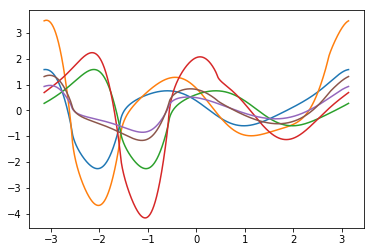

In [18]:
a = np.arange(-m.pi, m.pi, 0.0001)
b = forward_one((sy.sin(x)+1)**sy.sin(sy.cos(x)),a,1)
c = forward_two((sy.sin(x)+1)**sy.sin(sy.cos(x)),a,1)
d = backward_one((sy.sin(x)+1)**sy.sin(sy.cos(x)),a,1)
e = backward_two((sy.sin(x)+1)**sy.sin(sy.cos(x)),a,1)
f = centered_two((sy.sin(x)+1)**sy.sin(sy.cos(x)),a,1)
g = centered_four((sy.sin(x)+1)**sy.sin(sy.cos(x)),a,1)
plt.plot(list(a), list(b))
plt.plot(list(a), list(c))
plt.plot(list(a), list(d))
plt.plot(list(a), list(e))
plt.plot(list(a), list(f))
plt.plot(list(a), list(g))
plt.show()

**PROBLEM 3**

In [10]:
def my_function(f_in, x_in):
    a = exact_deriv(f_in, x_in)
    b_range = np.logspace(-8, 0, 9)
    result = []
    for h in b_range:
        #print(h)
        b = forward_one(f_in, x_in, h)
        result.append(abs(a-b))
    
    return result

def my_function2(f_in, x_in):
    a = exact_deriv(f_in, x_in)
    b_range = np.logspace(-8, 0, 9)
    result2 = []
    for h in b_range:
        #print(h)
        b = forward_two(f_in, x_in, h)
        result2.append(abs(a-b))
    
    return result2

def my_function3(f_in, x_in):
    a = exact_deriv(f_in, x_in)
    b_range = np.logspace(-8, 0, 9)
    result3 = []
    for h in b_range:
        #print(h)
        b = backward_one(f_in, x_in, h)
        result3.append(abs(a-b))
    
    return result3

def my_function4(f_in, x_in):
    a = exact_deriv(f_in, x_in)
    b_range = np.logspace(-8, 0, 9)
    result4 = []
    for h in b_range:
        #print(h)
        b = backward_two(f_in, x_in, h)
        result4.append(abs(a-b))
    
    return result4

def my_function5(f_in, x_in):
    a = exact_deriv(f_in, x_in)
    b_range = np.logspace(-8, 0, 9)
    result5 = []
    for h in b_range:
        #print(h)
        b = centered_two(f_in, x_in, h)
        result5.append(abs(a-b))
    
    return result5

def my_function6(f_in, x_in):
    a = exact_deriv(f_in, x_in)
    b_range = np.logspace(-8, 0, 9)
    result6 = []
    for h in b_range:
        #print(h)
        b = centered_four(f_in, x_in, h)
        result6.append(abs(a-b))
    
    return result6

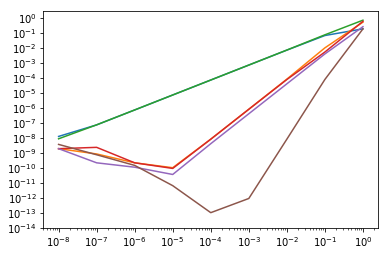

In [20]:
b_range = np.logspace(-8, 0, 9)
y_range = np.logspace(-14, 0, 15)
output = my_function((sy.sin(x)+1)**sy.sin(sy.cos(x)), 1)
output2 = my_function2((sy.sin(x)+1)**sy.sin(sy.cos(x)), 1)
output3 = my_function3((sy.sin(x)+1)**sy.sin(sy.cos(x)), 1)
output4 = my_function4((sy.sin(x)+1)**sy.sin(sy.cos(x)), 1)
output5 = my_function5((sy.sin(x)+1)**sy.sin(sy.cos(x)), 1)
output6 = my_function6((sy.sin(x)+1)**sy.sin(sy.cos(x)), 1)
plt.plot(list(b_range), list(output))
plt.plot(list(b_range), list(output2))
plt.plot(list(b_range), list(output3))
plt.plot(list(b_range), list(output4))
plt.plot(list(b_range), list(output5))
plt.plot(list(b_range), list(output6))
plt.xscale('log')
plt.xticks(b_range)
plt.yscale('log')
plt.yticks(y_range)
plt.show()

**PROBLEM 5**

In [58]:
def my_func(f, x_in, h_in):   
    dim_x = np.shape(x_in)[0]
    dim_f = np.shape(f(x_in))[0]
    
    Jacob = np.zeros((dim_f,dim_x))
    I = np.eye(dim_x) 
    
    for i in range(dim_x):
        e = I[:,i]   
        Jacob[:,i] = (f(x_in + h_in*e) - f(x_in - h_in*e)) / (2*h_in)
    
    return Jacob

In [59]:
f = lambda x: np.array([x[0] ** 2, x[0] ** 3 - x[1]])

In [61]:
my_func(f, np.array([1, 1]), 1e-3)

array([[ 2.      ,  0.      ],
       [ 3.000001, -1.      ]])

In [66]:
x, y = sy.symbols('x, y')
f1 = x ** 2
f2 = x ** 3 - y
F = sy.Matrix([f1,f2])  
F.jacobian([x,y]).subs([(x,1), (y,1)])

Matrix([
[2,  0],
[3, -1]])

**PROBLEM 6**

In [ ]:
from autograd import elementwise_grad

def tn(x, n):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        val = 2 * x * tn(x, n - 1) - tn(x, n - 2)
        return val

n = 5

plt.figure()

xv = np.linspace(-1, 1, 50)

for i in range(n):
    f = lambda x: tn(x, i)
    df = autograd.elementwise_grad(f)

    plt.plot(xv, df(xv))

plt.show()